In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")



In [2]:
X_train = pd.read_csv('train/X_train.csv')
y_train = pd.read_csv('train/y_train.csv').squeeze()  

X_val = pd.read_csv('validation/X_val.csv')
y_val = pd.read_csv('validation/y_val.csv').squeeze()

X_test = pd.read_csv('test/X_test.csv')
y_test = pd.read_csv('test/y_test.csv').squeeze()

In [3]:

scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [4]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"=== {model_name} Evaluation ===")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}\n")
    
    return mae, mse, rmse, r2

In [5]:
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  
)

rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [6]:
y_val_pred_rf = rf_regressor.predict(X_val_scaled)
rf_val_mae, rf_val_mse, rf_val_rmse, rf_val_r2 = evaluate_model(y_val, y_val_pred_rf, model_name="Random Forest (Bagging)")

gb_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

=== Random Forest (Bagging) Evaluation ===
MAE: 0.0941
MSE: 0.0218
RMSE: 0.1476
R² Score: 0.9795



In [7]:
gb_regressor.fit(X_train_scaled, y_train)

print("Gradient Boosting Regressor Trained.")

y_val_pred_gb = gb_regressor.predict(X_val_scaled)

gb_val_mae, gb_val_mse, gb_val_rmse, gb_val_r2 = evaluate_model(y_val, y_val_pred_gb, model_name="Gradient Boosting")

Gradient Boosting Regressor Trained.
=== Gradient Boosting Evaluation ===
MAE: 0.1169
MSE: 0.0272
RMSE: 0.1650
R² Score: 0.9743



In [8]:
y_test_pred_rf = rf_regressor.predict(X_test_scaled)
rf_test_mae, rf_test_mse, rf_test_rmse, rf_test_r2 = evaluate_model(y_test, y_test_pred_rf, model_name="Random Forest on Test Set")

y_test_pred_gb = gb_regressor.predict(X_test_scaled)
gb_test_mae, gb_test_mse, gb_test_rmse, gb_test_r2 = evaluate_model(y_test, y_test_pred_gb, model_name="Gradient Boosting on Test Set")


=== Random Forest on Test Set Evaluation ===
MAE: 0.0899
MSE: 0.0178
RMSE: 0.1334
R² Score: 0.9820

=== Gradient Boosting on Test Set Evaluation ===
MAE: 0.1156
MSE: 0.0244
RMSE: 0.1563
R² Score: 0.9753



In [9]:
results = {
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Validation MAE': [rf_val_mae, gb_val_mae],
    'Validation MSE': [rf_val_mse, gb_val_mse],
    'Validation RMSE': [rf_val_rmse, gb_val_rmse],
    'Validation R² Score': [rf_val_r2, gb_val_r2],
    'Test MAE': [rf_test_mae, gb_test_mae],
    'Test MSE': [rf_test_mse, gb_test_mse],
    'Test RMSE': [rf_test_rmse, gb_test_rmse],
    'Test R² Score': [rf_test_r2, gb_test_r2]
}

results_df = pd.DataFrame(results)
print("Evaluation Results:")
print(results_df)

Evaluation Results:
               Model  Validation MAE  Validation MSE  Validation RMSE  \
0      Random Forest        0.094088        0.021772         0.147554   
1  Gradient Boosting        0.116869        0.027234         0.165027   

   Validation R² Score  Test MAE  Test MSE  Test RMSE  Test R² Score  
0             0.979461  0.089876  0.017804   0.133433       0.981995  
1             0.974308  0.115550  0.024433   0.156309       0.975293  


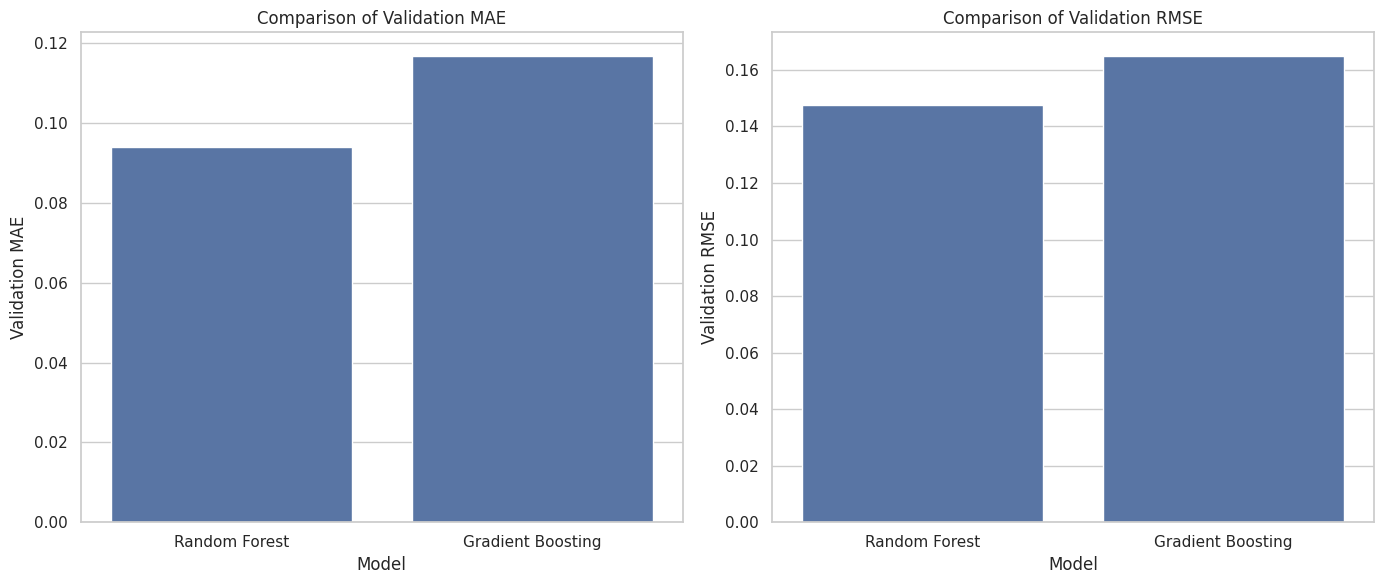

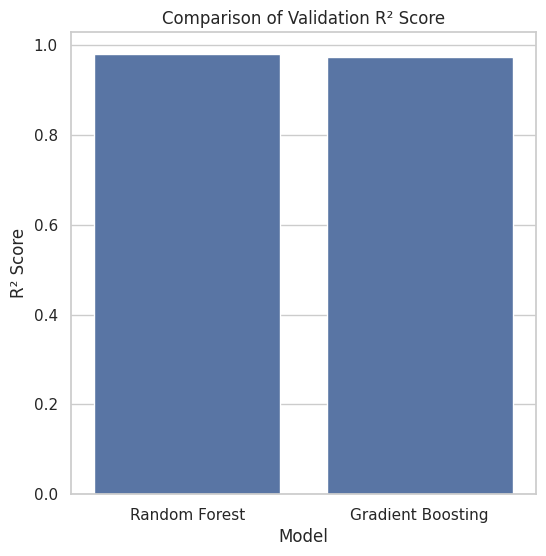

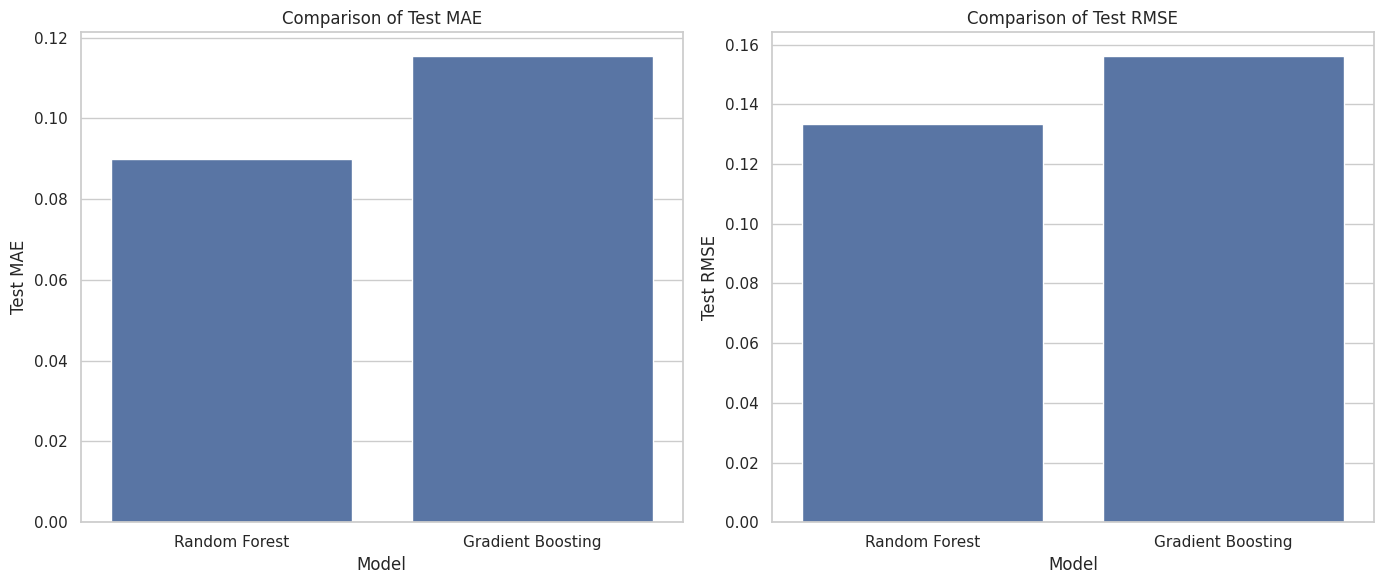

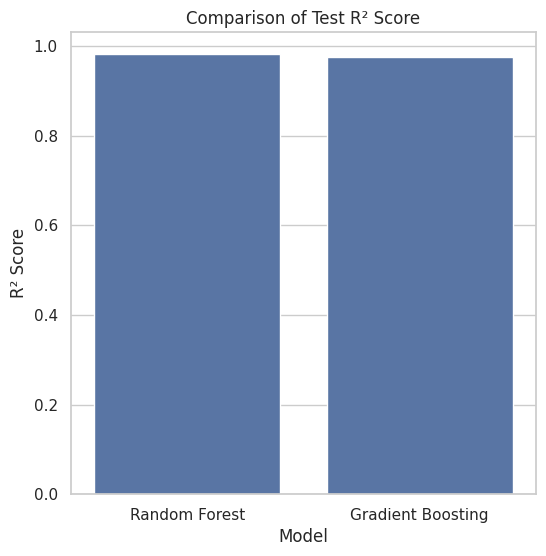

In [10]:
# Visualization of Validation Metrics
plt.figure(figsize=(14, 6))

# Plot MAE and RMSE for Validation Set
metrics = ['Validation MAE', 'Validation RMSE']
for i, metric in enumerate(metrics):
    plt.subplot(1, 2, i+1)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Comparison of {metric}')
    plt.ylabel(metric)
    plt.xlabel('Model')

plt.tight_layout()
plt.show()

# Visualization of R² Score for Validation Set
plt.figure(figsize=(6, 6))
sns.barplot(x='Model', y='Validation R² Score', data=results_df)
plt.title('Comparison of Validation R² Score')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.show()

# Visualization of Test Metrics
plt.figure(figsize=(14, 6))

# Plot MAE and RMSE for Test Set
test_metrics = ['Test MAE', 'Test RMSE']
for i, metric in enumerate(test_metrics):
    plt.subplot(1, 2, i+1)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Comparison of {metric}')
    plt.ylabel(metric)
    plt.xlabel('Model')

plt.tight_layout()
plt.show()

# Visualization of R² Score for Test Set
plt.figure(figsize=(6, 6))
sns.barplot(x='Model', y='Test R² Score', data=results_df)
plt.title('Comparison of Test R² Score')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.show()

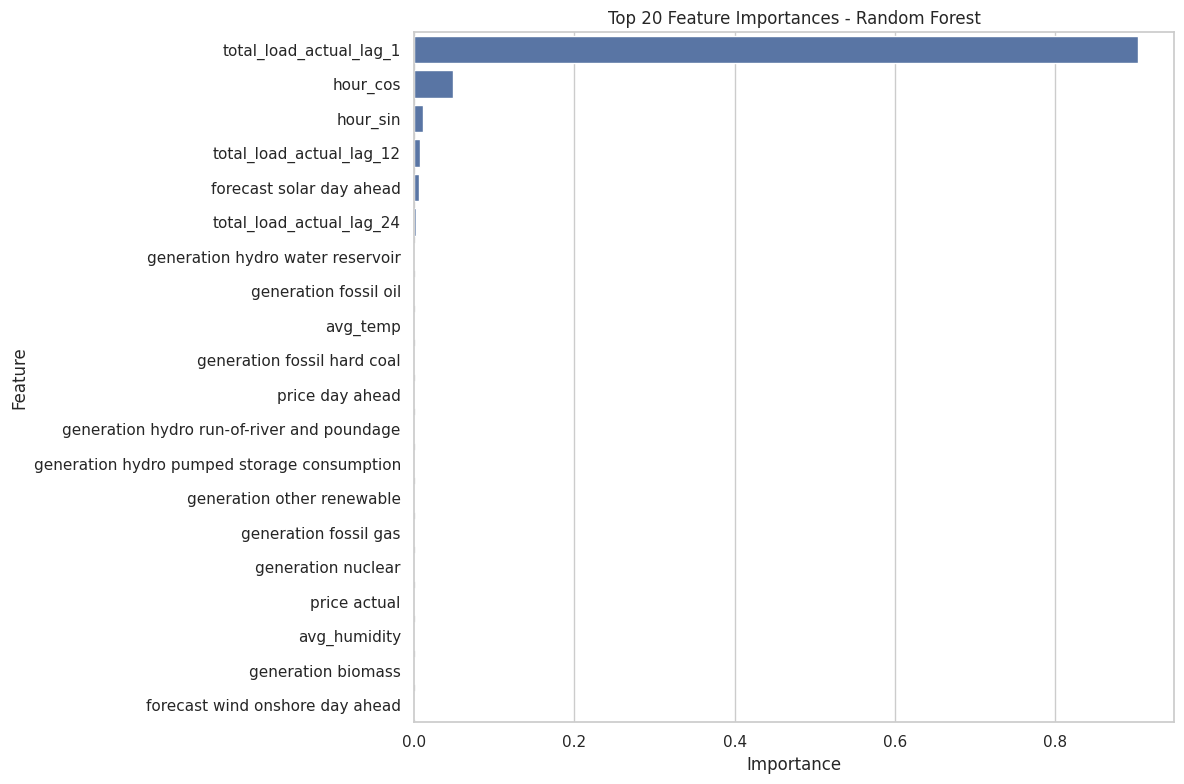

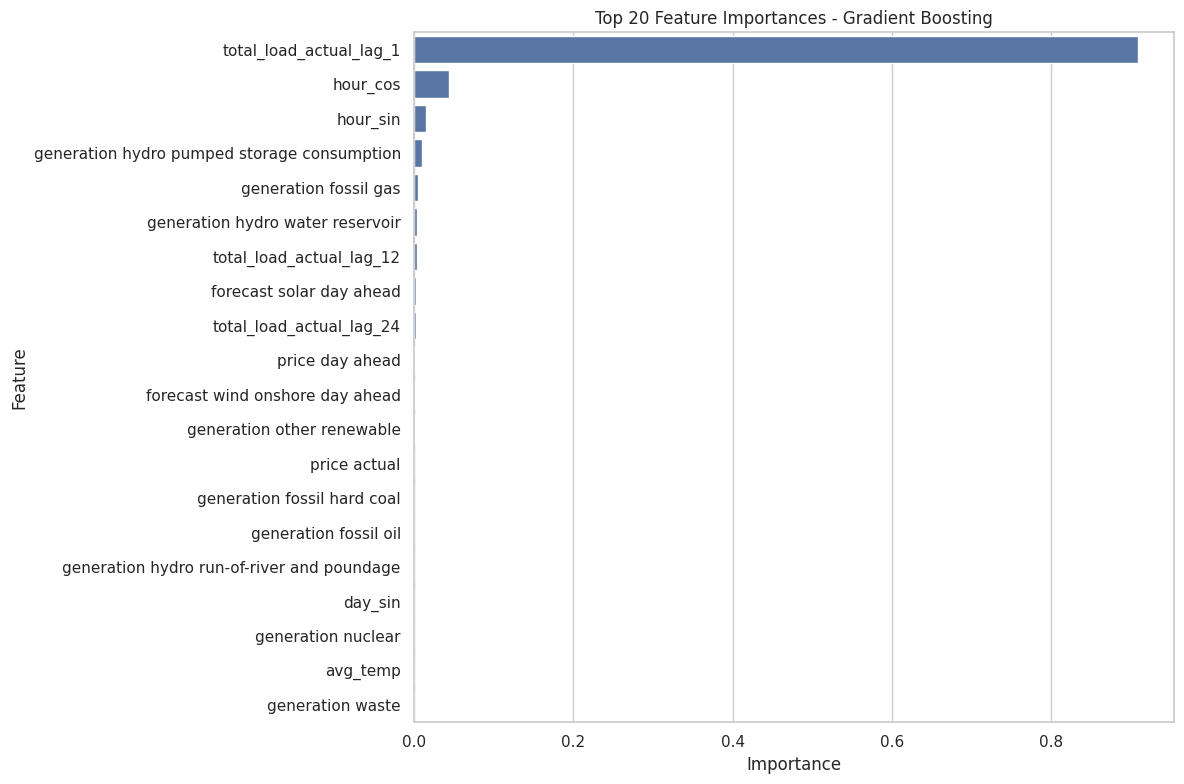

In [11]:
# Feature Importances for Random Forest
importances_rf = rf_regressor.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(20))
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

# Feature Importances for Gradient Boosting
importances_gb = gb_regressor.feature_importances_

# Create a DataFrame
feature_importance_gb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_gb
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb.head(20))
plt.title('Top 20 Feature Importances - Gradient Boosting')
plt.tight_layout()
plt.show()

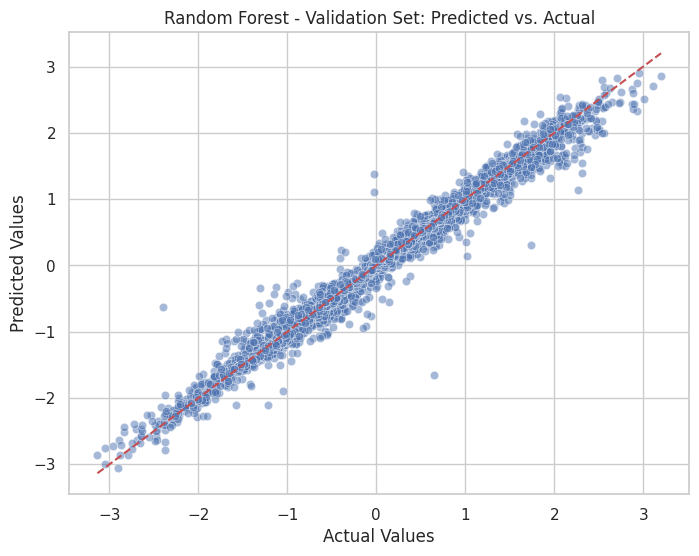

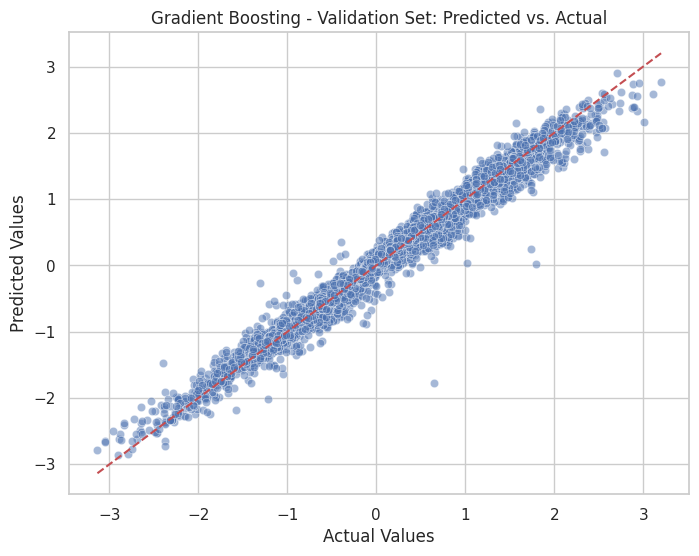

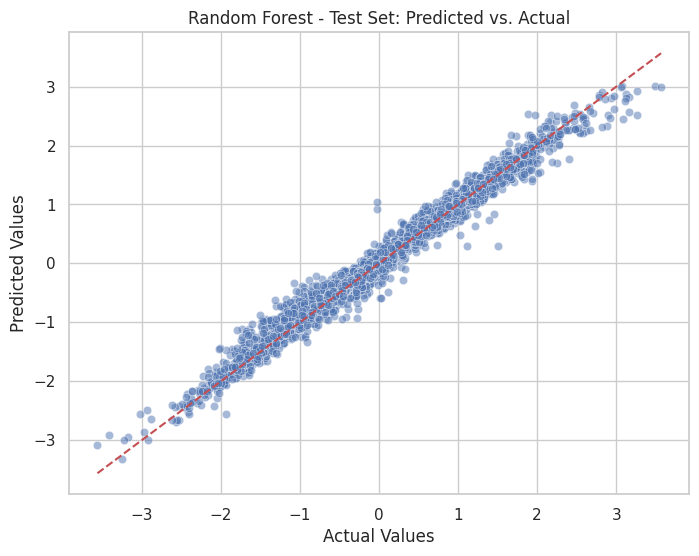

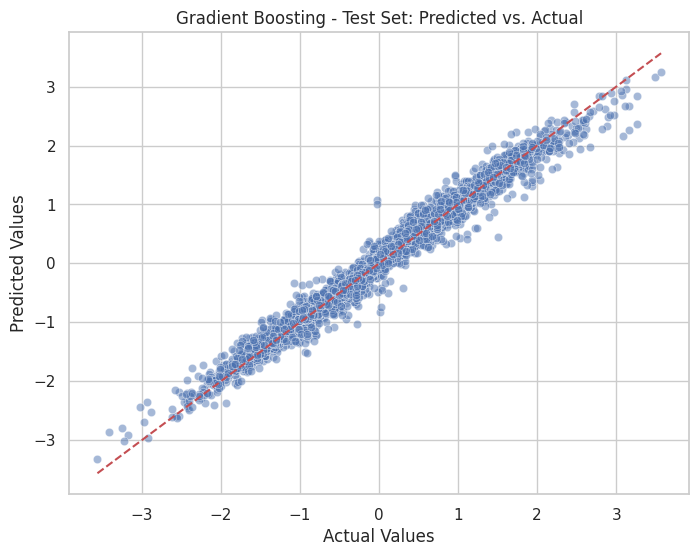

In [12]:
# 1. Predicted vs. Actual Scatter Plots
def plot_predicted_vs_actual(y_true, y_pred, model_name, dataset_type="Validation"):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # Diagonal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - {dataset_type} Set: Predicted vs. Actual')
    plt.show()

# Random Forest - Validation Set
plot_predicted_vs_actual(y_val, y_val_pred_rf, "Random Forest", "Validation")

# Gradient Boosting - Validation Set
plot_predicted_vs_actual(y_val, y_val_pred_gb, "Gradient Boosting", "Validation")

# Random Forest - Test Set
plot_predicted_vs_actual(y_test, y_test_pred_rf, "Random Forest", "Test")

# Gradient Boosting - Test Set
plot_predicted_vs_actual(y_test, y_test_pred_gb, "Gradient Boosting", "Test")

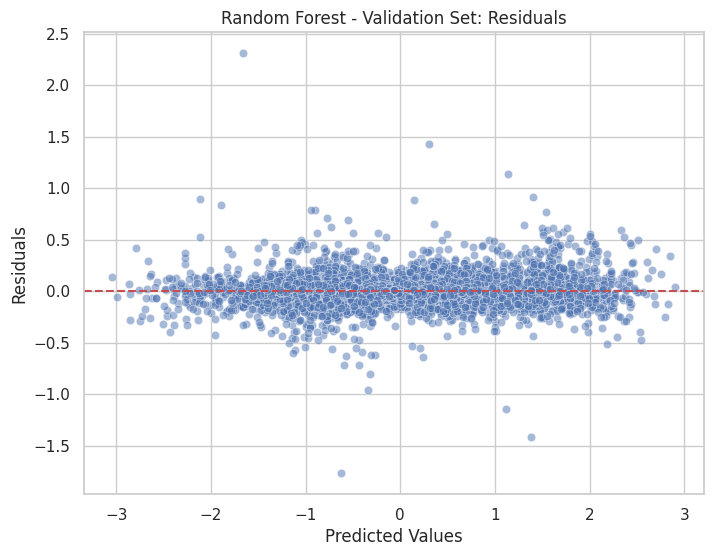

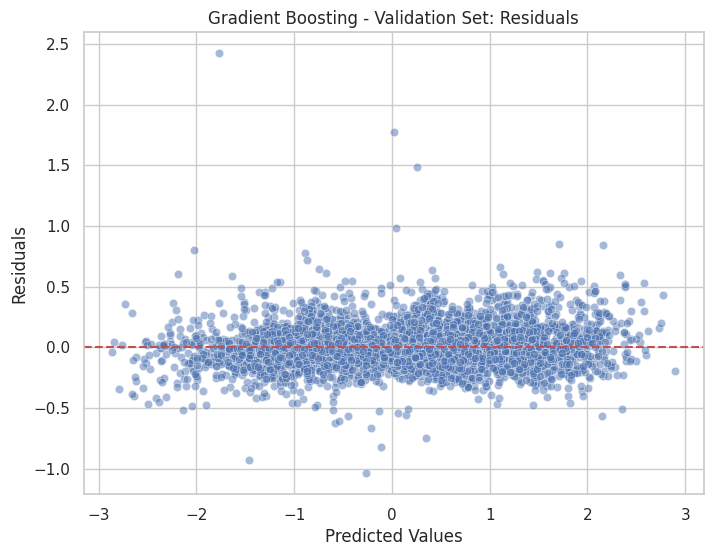

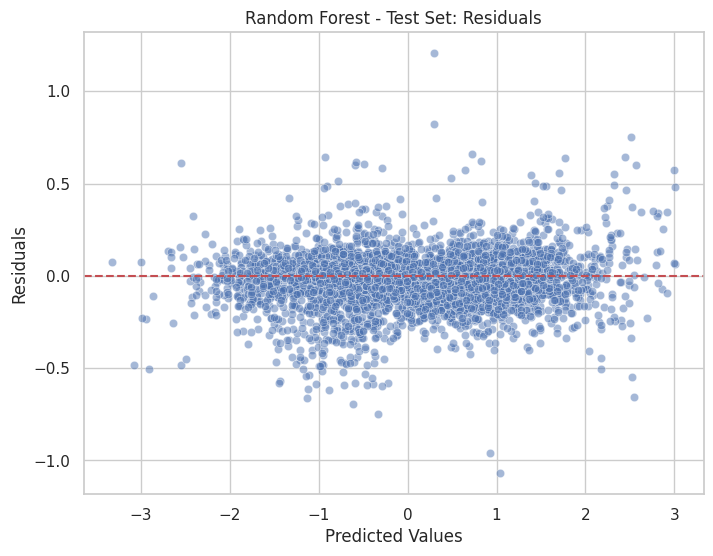

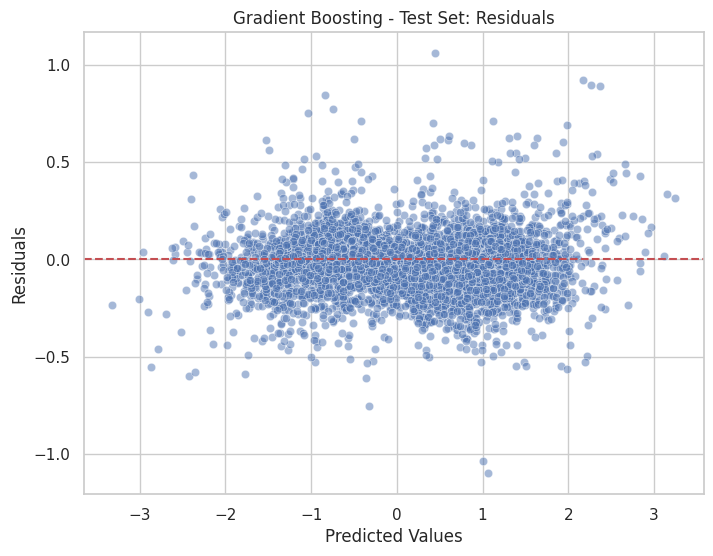

In [13]:
# 2. Residual Plots
def plot_residuals(y_true, y_pred, model_name, dataset_type="Validation"):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - {dataset_type} Set: Residuals')
    plt.show()

# Random Forest - Validation Set
plot_residuals(y_val, y_val_pred_rf, "Random Forest", "Validation")

# Gradient Boosting - Validation Set
plot_residuals(y_val, y_val_pred_gb, "Gradient Boosting", "Validation")

# Random Forest - Test Set
plot_residuals(y_test, y_test_pred_rf, "Random Forest", "Test")

# Gradient Boosting - Test Set
plot_residuals(y_test, y_test_pred_gb, "Gradient Boosting", "Test")

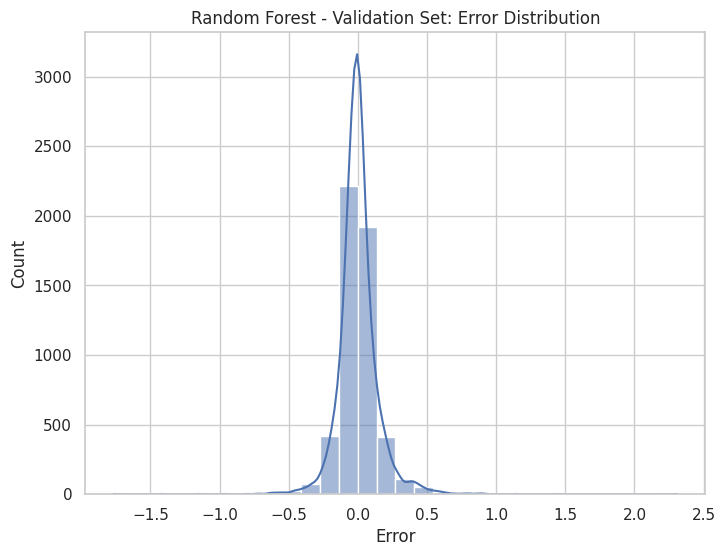

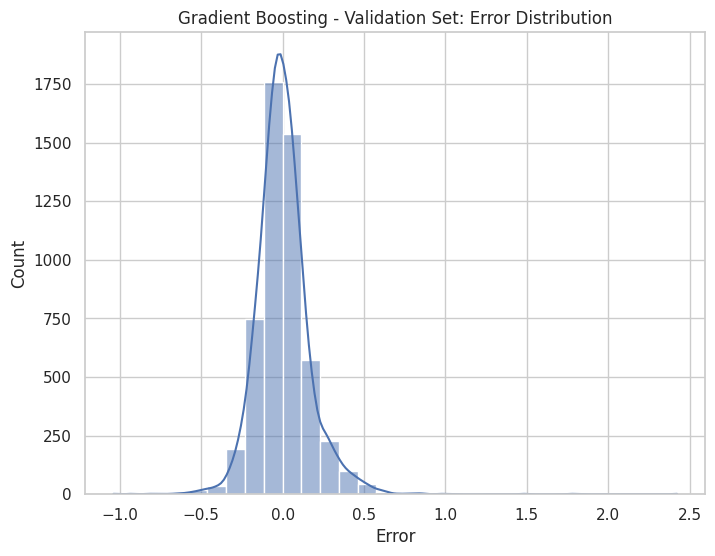

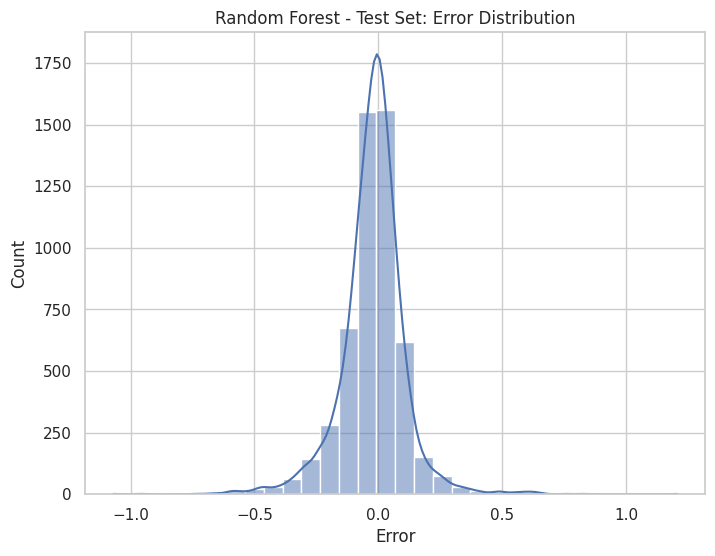

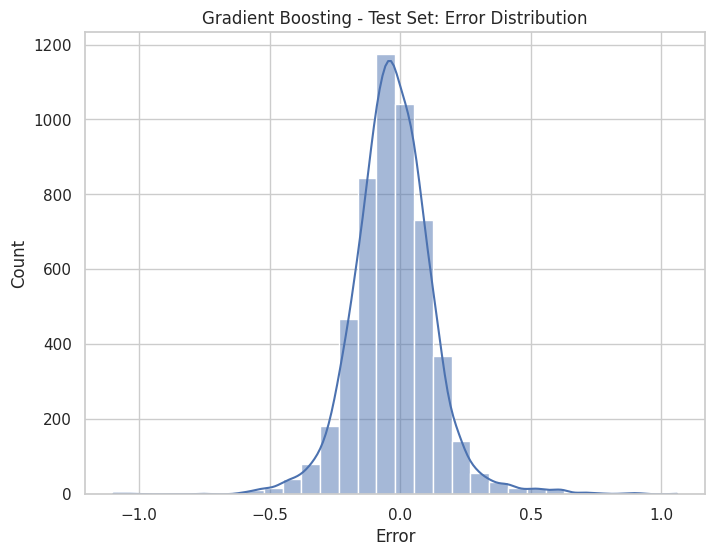

In [14]:
# 3. Error Distribution Histograms
def plot_error_distribution(y_true, y_pred, model_name, dataset_type="Validation"):
    errors = y_true - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(errors, bins=30, kde=True)
    plt.xlabel('Error')
    plt.title(f'{model_name} - {dataset_type} Set: Error Distribution')
    plt.show()

# Random Forest - Validation Set
plot_error_distribution(y_val, y_val_pred_rf, "Random Forest", "Validation")

# Gradient Boosting - Validation Set
plot_error_distribution(y_val, y_val_pred_gb, "Gradient Boosting", "Validation")

# Random Forest - Test Set
plot_error_distribution(y_test, y_test_pred_rf, "Random Forest", "Test")

# Gradient Boosting - Test Set
plot_error_distribution(y_test, y_test_pred_gb, "Gradient Boosting", "Test")

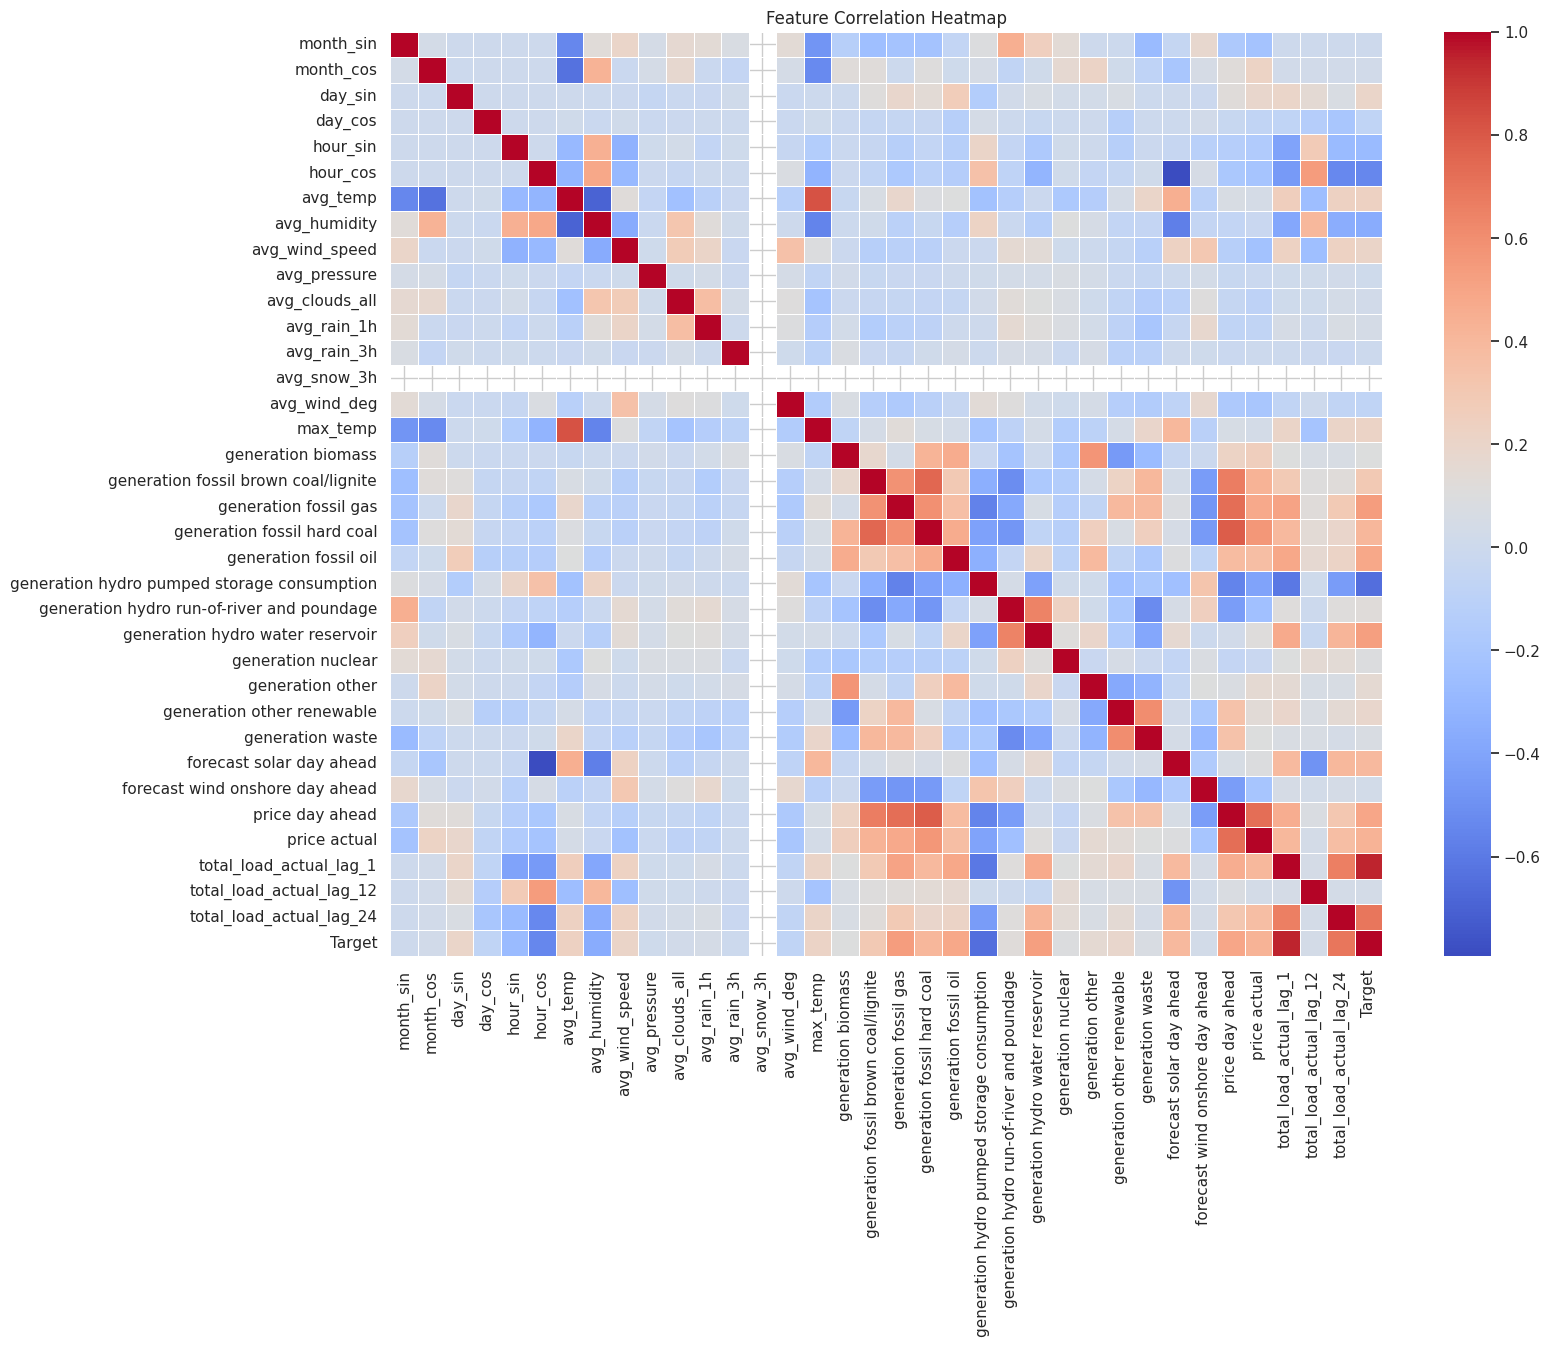

In [15]:
# 4. Correlation Heatmap
def plot_correlation_heatmap(df, title="Correlation Heatmap"):
    plt.figure(figsize=(16, 12))
    corr = df.corr()
    sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

# Combine training features with target for correlation
train_data = pd.concat([X_train, y_train.rename('Target')], axis=1)

plot_correlation_heatmap(train_data, "Feature Correlation Heatmap")

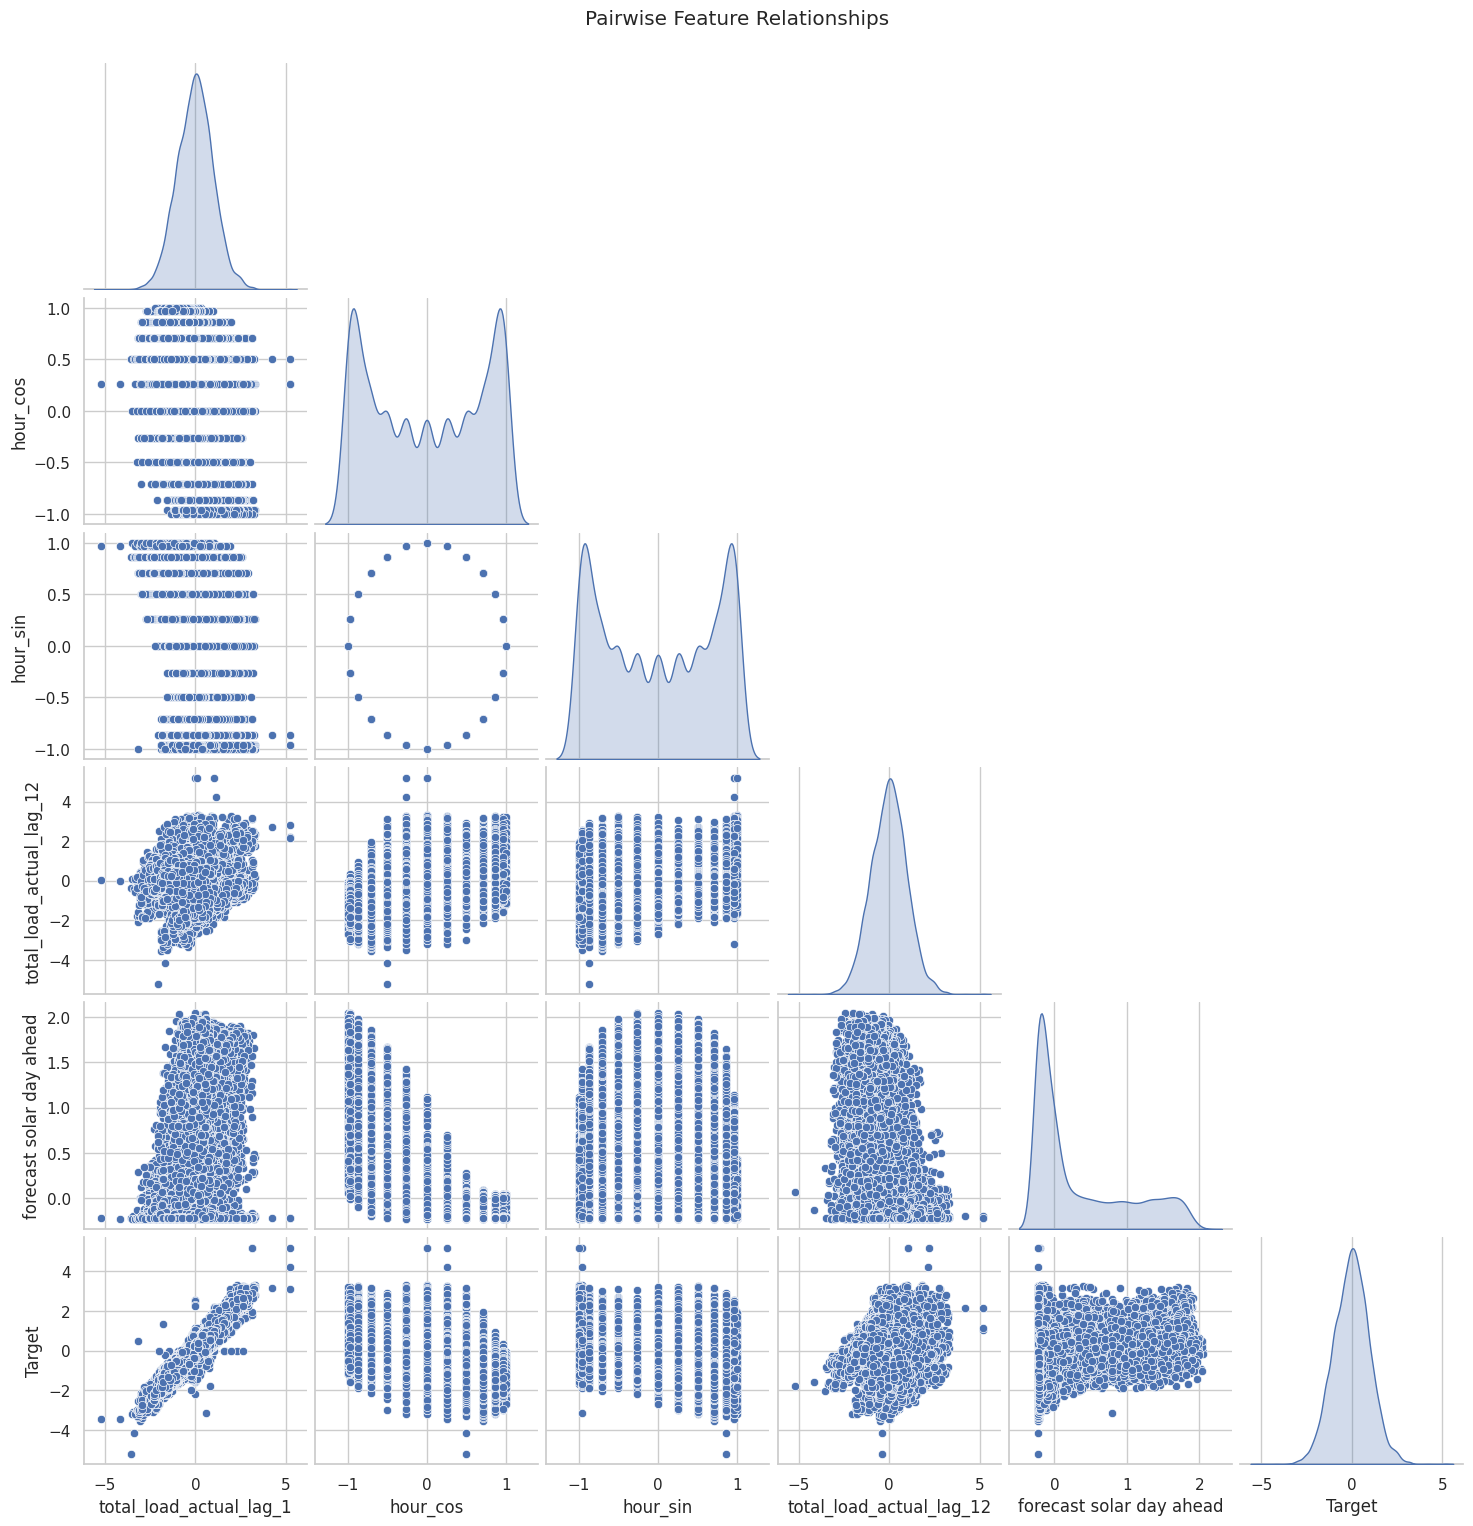

In [16]:
# 5. Pair Plots (selecting a subset of features for clarity)
def plot_pairwise_relationships(df, features, target):
    sns.pairplot(df[features + [target]], diag_kind='kde', kind='scatter', corner=True)
    plt.suptitle('Pairwise Feature Relationships', y=1.02)
    plt.show()

# Select top 5 features based on Random Forest importance
top5_features_rf = feature_importance_rf['Feature'].head(5).tolist()

plot_pairwise_relationships(train_data, top5_features_rf, 'Target')

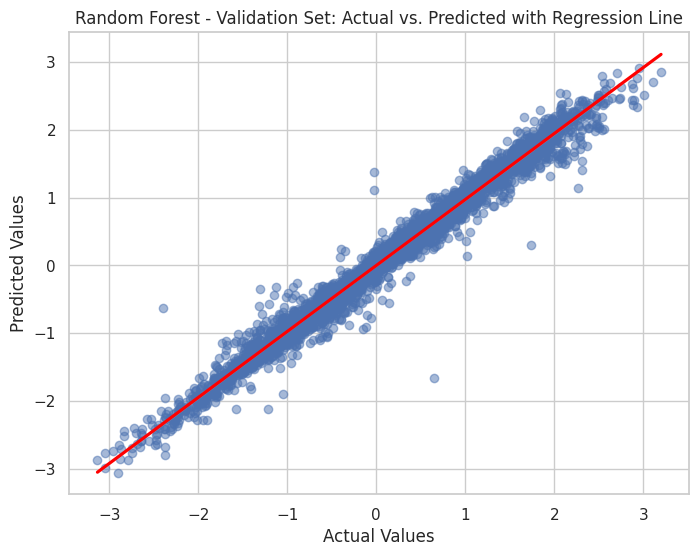

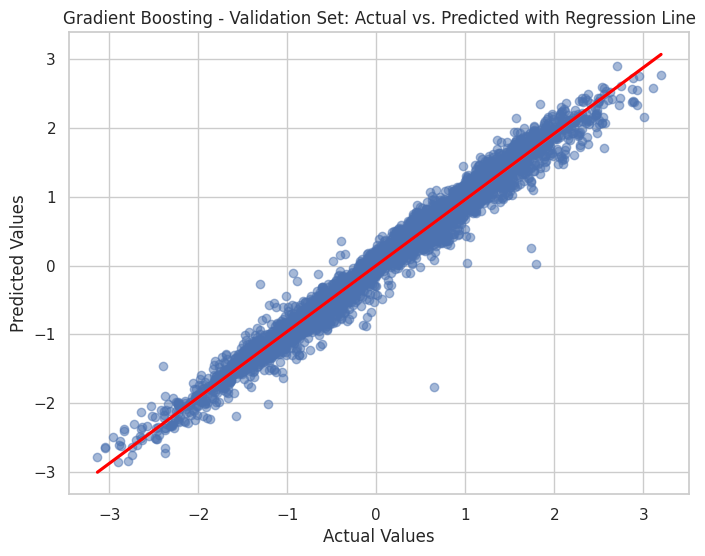

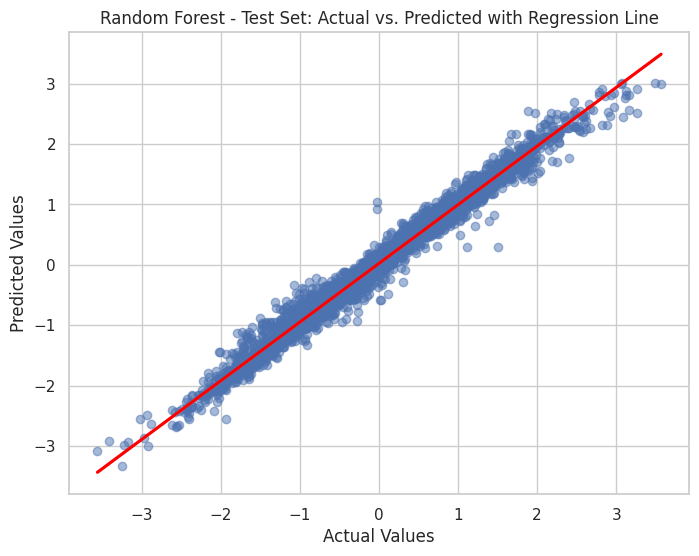

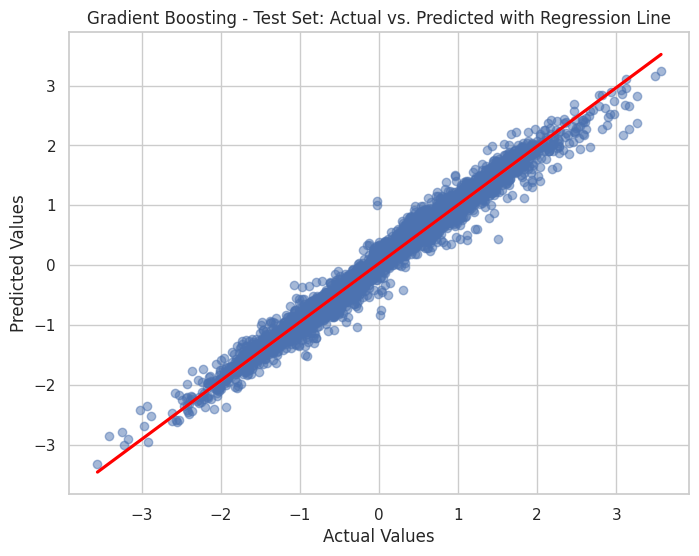

In [17]:
# 6. Actual vs. Predicted with Regression Line
def plot_actual_vs_predicted_regression(y_true, y_pred, model_name, dataset_type="Validation"):
    plt.figure(figsize=(8,6))
    sns.regplot(
        x=y_true, 
        y=y_pred, 
        scatter_kws={'alpha': 0.5},  # Corrected from 'scatter_k' to 'scatter_kws'
        line_kws={"color": "red"}, 
        fit_reg=True  # You can also use 'reg=True' if 'fit_reg' is deprecated
    )
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - {dataset_type} Set: Actual vs. Predicted with Regression Line')
    plt.show()

# Random Forest - Validation Set
plot_actual_vs_predicted_regression(y_val, y_val_pred_rf, "Random Forest", "Validation")

# Gradient Boosting - Validation Set
plot_actual_vs_predicted_regression(y_val, y_val_pred_gb, "Gradient Boosting", "Validation")

# Random Forest - Test Set
plot_actual_vs_predicted_regression(y_test, y_test_pred_rf, "Random Forest", "Test")

# Gradient Boosting - Test Set
plot_actual_vs_predicted_regression(y_test, y_test_pred_gb, "Gradient Boosting", "Test")

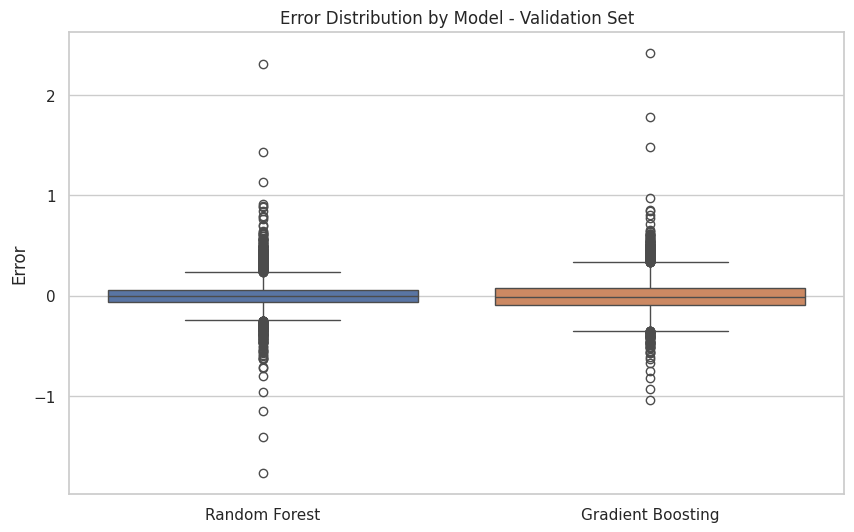

In [18]:
# 7. Box Plots of Errors by Model
def plot_error_boxplots(y_true_rf, y_pred_rf, y_true_gb, y_pred_gb, dataset_type="Validation"):
    errors_rf = y_true_rf - y_pred_rf
    errors_gb = y_true_gb - y_pred_gb
    errors_df = pd.DataFrame({
        'Random Forest': errors_rf,
        'Gradient Boosting': errors_gb
    })
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=errors_df)
    plt.title(f'Error Distribution by Model - {dataset_type} Set')
    plt.ylabel('Error')
    plt.show()

# Box Plots for Validation Set
plot_error_boxplots(y_val, y_val_pred_rf, y_val, y_val_pred_gb, "Validation")

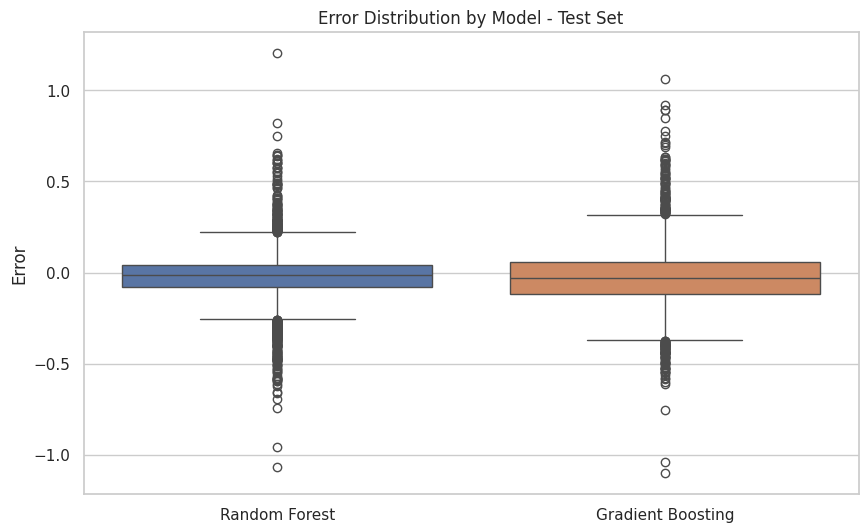

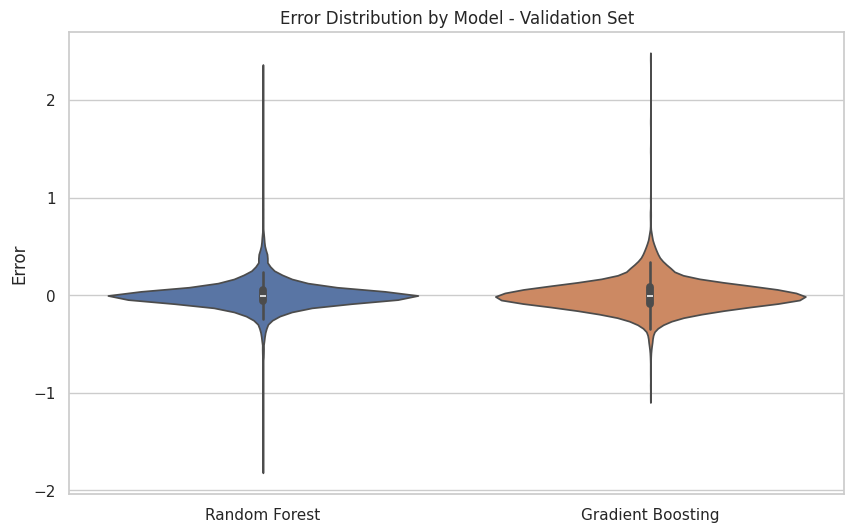

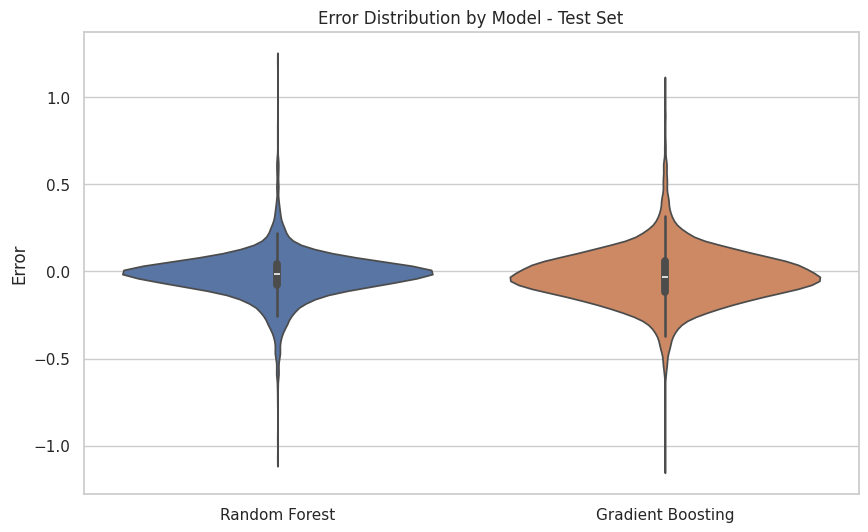

In [19]:
# Box Plots for Test Set
plot_error_boxplots(y_test, y_test_pred_rf, y_test, y_test_pred_gb, "Test")

# 8. Violin Plots of Errors by Model
def plot_error_violinplots(y_true_rf, y_pred_rf, y_true_gb, y_pred_gb, dataset_type="Validation"):
    errors_rf = y_true_rf - y_pred_rf
    errors_gb = y_true_gb - y_pred_gb
    errors_df = pd.DataFrame({
        'Random Forest': errors_rf,
        'Gradient Boosting': errors_gb
    })
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=errors_df)
    plt.title(f'Error Distribution by Model - {dataset_type} Set')
    plt.ylabel('Error')
    plt.show()

# Violin Plots for Validation Set
plot_error_violinplots(y_val, y_val_pred_rf, y_val, y_val_pred_gb, "Validation")

# Violin Plots for Test Set
plot_error_violinplots(y_test, y_test_pred_rf, y_test, y_test_pred_gb, "Test")

<Figure size 1200x800 with 0 Axes>

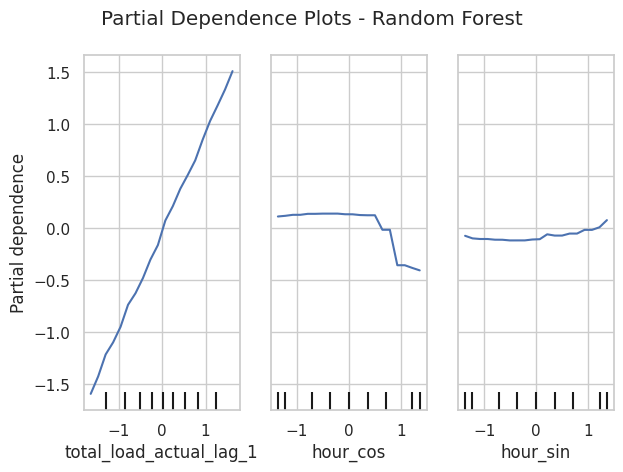

<Figure size 1200x800 with 0 Axes>

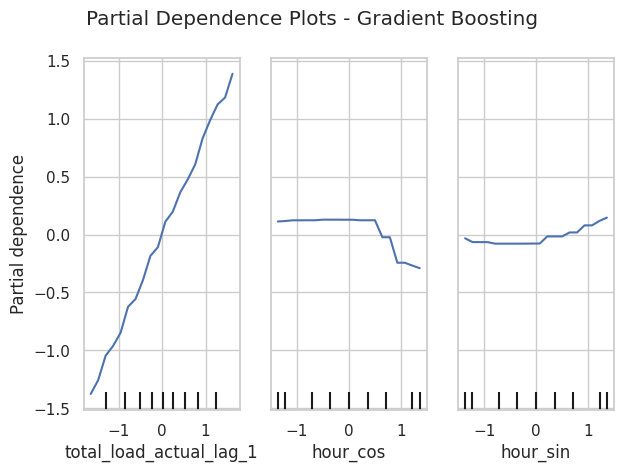

In [20]:
# 10. Partial Dependence Plots (PDP) for Top Features
from sklearn.inspection import PartialDependenceDisplay

def plot_partial_dependence(estimator, X, features, feature_names, model_name):
    plt.figure(figsize=(12, 8))
    PartialDependenceDisplay.from_estimator(estimator, X, features, feature_names=feature_names, grid_resolution=20)
    plt.suptitle(f'Partial Dependence Plots - {model_name}')
    plt.tight_layout()
    plt.show()

# Select top 3 features for PDP
top3_features_rf = feature_importance_rf['Feature'].head(3).tolist()
top3_features_gb = feature_importance_gb['Feature'].head(3).tolist()

# Plot PDP for Random Forest
plot_partial_dependence(rf_regressor, X_train_scaled, top3_features_rf, feature_names, "Random Forest")

# Plot PDP for Gradient Boosting
plot_partial_dependence(gb_regressor, X_train_scaled, top3_features_gb, feature_names, "Gradient Boosting")